<center>
    <h1><b> Features Engineeering - IQR Outlier Removal</b></h1>
</center>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import norm


%matplotlib inline

In [2]:
data = {'name': ['mohan', 'maria', 'sakib', 'tao', 'virat', 'khusbu', 'dmitry', 'selena', 'john', 'imran', 'jose', 'deepika', 'yoseph', 'binod', 'gulshan', 'johnson', 'donald', 'aamir', 'ken', 'liu'],
       'height': [1.2, 2.3, 4.9, 5.1, 5.2, 5.4, 5.5, 5.5, 5.6, 5.6, 5.8, 5.9, 6, 6.1, 6.2, 6.5, 7.1, 14.5, 23.2, 40.2]
       }

In [3]:
df  = pd.DataFrame(data)

In [4]:
df[:4]

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1


In [6]:
df.describe().loc[['mean', 'min', 'max', 'std']].T

,mean,min,max,std
height,8.39,1.2,40.2,8.782812


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
height,20.0,8.39,8.782812,1.2,5.35,5.7,6.275,40.2


In [9]:
Q1 = df['height'].quantile(0.25)  # The first 25 percent of the data
Q2 = df['height'].quantile(0.70) 
Q3 = df['height'].quantile(0.75) 

In [10]:
Q1, Q3 

(5.3500000000000005, 6.275)

In [11]:
IQR = Q3 - Q1

In [12]:
lower_limit = Q1 - 1.5 * IQR

upper_limit = Q3 + 1.5 * IQR


In [18]:
f'Lower limit: {lower_limit} | Upper limit: {upper_limit}'

'Lower limit: 3.962500000000001 | Upper limit: 7.6625'

In [19]:
# using lower limit and upper limit to detect outliers

df[(df['height'] < lower_limit) | (df['height'] > upper_limit)]

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,liu,40.2


In [21]:
# To remove outliers from the dataframe
df1 = df[(df['height'] > lower_limit) & (df['height'] < upper_limit)]
df1

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9


## Using IQR to detect outliers in  height and weight dataframe

In [22]:
df2 = pd.read_csv('weight_height.csv')

In [23]:
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [43]:
df2.shape

(10000, 3)

C:\Users\Banji\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Banji\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


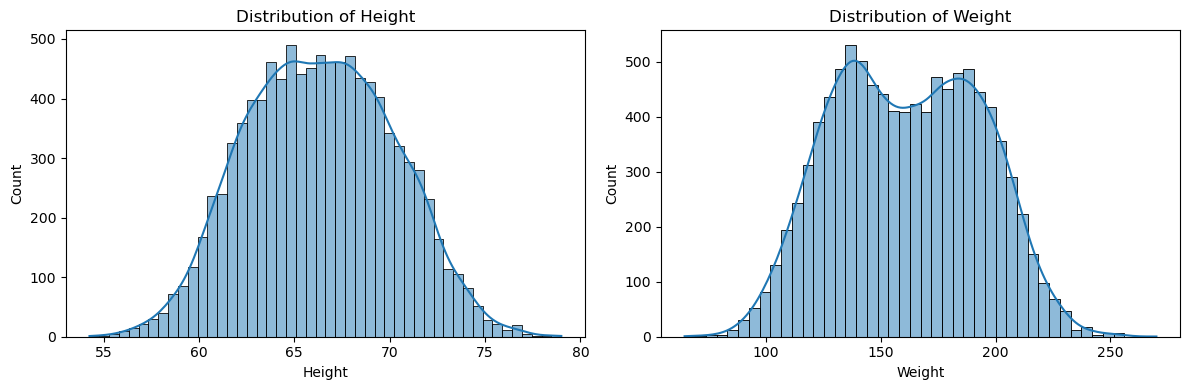

In [33]:
# Set the size of the plots
plt.figure(figsize=(12, 4))  # Adjust the figure size to fit two plots side by side

# Loop through each column and create a histogram with KDE
for i, column in enumerate(['Height', 'Weight'], 1):  # Loop over index and column names
    plt.subplot(1, 2, i)  # Create 1 row, 2 columns of subplots
    sb.histplot(df2[column], kde=True)  # Plotting histogram with KDE
    plt.title(f'Distribution of {column}')  # Title for each subplot

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


## Using Q1, Q3, and IQR to Remove Outliers in Height

In [37]:
h_Q1 = df2['Height'].quantile(0.25)  # The first 25 percent of the data

h_Q3 = df2['Height'].quantile(0.75) 

In [38]:
h_Q1, h_Q3

(63.505620481218955, 69.1742617268347)

In [40]:
h_IQR = h_Q3 - h_Q1
h_IQR

5.668641245615746

In [41]:
h_lower_limit = Q1 - 1.5 * IQR

h_upper_limit = Q3 + 1.5 * IQR

In [42]:
h_lower_limit,  h_upper_limit

(55.00265861279534, 77.67722359525831)

In [44]:
# using lower limit and upper limit to detect outliers
df2[(df2['Height'] < h_lower_limit) | (df2['Height'] > h_upper_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [45]:
# using lower limit and upper limit to detect outliers
df3 = df2[(df2['Height'] > h_lower_limit) & (df2['Height'] < h_upper_limit)]
df3.shape

(9992, 3)

### Viewing the distribution of Height after removing outliers

C:\Users\Banji\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


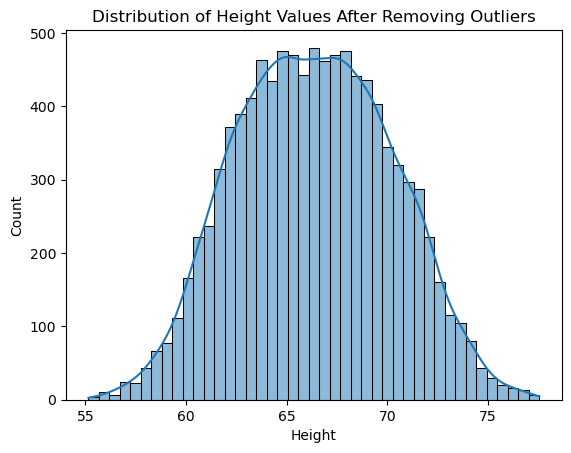

In [46]:
# Visualizing the distribution after removing outliers
sb.histplot(df3['Height'], kde=True)
plt.title('Distribution of Height Values After Removing Outliers')
plt.show();

## Using Q1, Q3, and IQR to Remove Outliers in Weight

In [73]:
w_Q1 = df3['Weight'].quantile(0.25)  # The first 25 percent of the data

w_Q3 = df3['Weight'].quantile(0.75) 

In [74]:
w_Q1, w_Q3

(135.82126866320925, 187.1246464833845)

In [75]:
w_IQR = w_Q3 - w_Q1
w_IQR

51.30337782017526

In [76]:
w_lower_limit = w_Q1 - 1.5 * IQR

w_upper_limit = w_Q3 + 1.5 * IQR

In [77]:
w_lower_limit, w_upper_limit

(127.31830679478563, 195.62760835180814)

In [78]:
# using lower limit and upper limit to detect outliers
df3[(df3['Weight'] < h_lower_limit) | (df3['Weight'] > h_upper_limit)]

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


## Plotting ormal Distribution Using Scikit Library

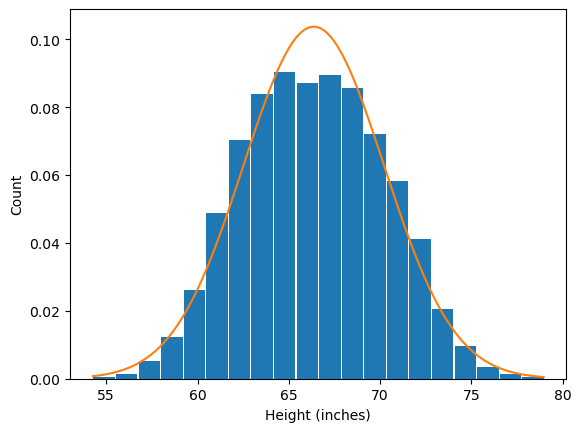

In [88]:
plt.hist(df2['Height'], bins = 20, rwidth = 0.95, density = True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df2['Height'].min(), df2['Height'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, df2['Height'].mean(), df2['Height'].std(0)))

In [ ]:
import lightgbm as lgb

In [ ]:
pip install lightgbm